In [32]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/Users/sinha7290/public_html/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [33]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
def getGene(ana, name):
    id1 = ana.h.getBestID(ana.h.getIDs(name).keys())
    expr = ana.h.getExprData(id1)
    lval = [[] for i in ana.atypes]
    if expr is None:
        print("Not Found")
        return lval
    aval = ana.aval
    for i in ana.h.aRange():
        if aval[i] is None:
            continue
        lval[aval[i]] += [float(expr[i])]
    return lval

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])

    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] + ' ' +
              "({0},{1})".format(k['#Cont'][0], k['#Expt'][0]) for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(6, len(dfs)*0.5+1), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

Ebright 2020 (n = 135)
GSE144494 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB8
28 4 24 0 TNB8
[1, 20]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

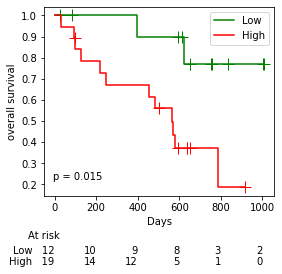

In [42]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/gprint_final/CTC_km.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()

ana.getebright2020()

ana.order = [i for i in ana.h.aRange()]
df = pd.DataFrame()
time = ana.h.getSurvName('time')
ahash = {'NA':'', 'time':''}
df['time'] = ['' if k in ahash else k for k in time]

status = ana.h.getSurvName('status')
ahash = {'NA':''}
#df['status'] = ['' if k in ahash else k for k in status]
df['status'] = ['' if k in ahash else re.sub("[\s]", "", str(k)) for k in status]





cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

ana.orderData(l1, wt1)
df['MMP'] = [None, None] + list(ana.f_ranks)

thr = hu.getThrData(ana.f_ranks)

g1 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] < fthr]
g2 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] >= fthr]

pG = [ ["Low" , "green", g1], ["High", "red", g2]]

time = ['' if k == None or k == '' else float(k) for k in df['time']]
status = [df['status'][i] if df['time'][i] != '0' else '0' for i in range(len(time))]
ax = hu.survival(time, status, pG)
ax.set_xlabel('Days')
ax.set_ylabel('overall survival')
pdf.savefig(transparent=True)
closePDF(pdf)
plt.show()